In [47]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LinearSVM,
    HingeLoss,
    Trainer
)

# User-defined functions
from utils.preprocess import clusters, onehot

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [ ]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 50
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [49]:
X, y = clusters(SIZE, means=[(-3, -3), (3, 3)], stds=[0.9, 1.2])

In [50]:
print("Generated X:", X, "\nGenerated y:", y, sep='\n')
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-2.6734, -2.9508],
        [-2.8494, -3.3248],
        [-3.1931, -2.3254],
        [-2.4844, -2.6299],
        [-2.5506, -3.6151],
        [-3.0671, -2.3819],
        [-3.3323, -2.4051],
        [-4.2877, -2.6256],
        [-3.4563, -4.2933],
        [-3.7394, -2.5321],
        [-3.0839, -2.1640],
        [-2.8105, -4.1002],
        [-3.3267, -4.3585],
        [-3.1238, -2.6586],
        [-3.1020, -3.2009],
        [-3.6758, -1.8202],
        [-2.5314, -2.3343],
        [-2.7680, -1.6563],
        [-3.5746, -1.4354],
        [-2.8048, -2.8826],
        [-2.1471, -3.0136],
        [-3.9145, -4.3085],
        [-3.0663, -2.6773],
        [-4.3079, -2.9564],
        [-1.9493, -1.1876],
        [-2.1339, -3.9309],
        [-2.8672, -1.9251],
        [-4.6131, -2.2277],
        [-2.6261, -3.0445],
        [-1.3855, -2.8397],
        [-3.9333, -2.6550],
        [-4.0909, -2.9959],
        [-3.1776, -2.6265],
        [-3.1955, -2.7623],
        [-3.9751, -3.2034],
       

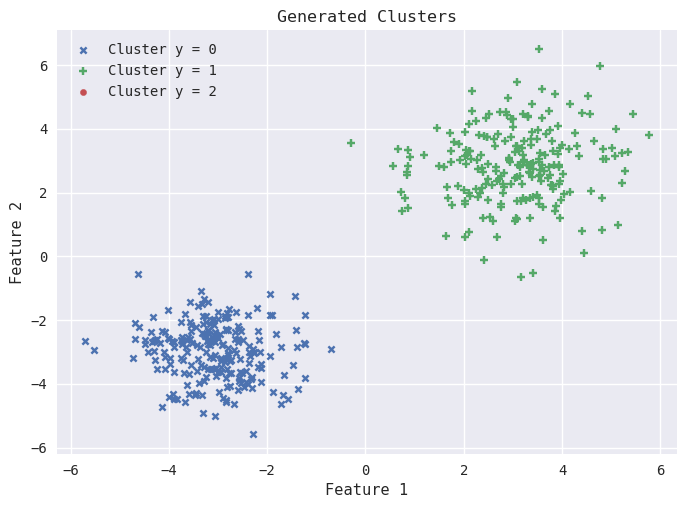

In [51]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', label='Cluster y = 2', s=20)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [52]:
y[y == 0] = -1.0
y[y == 1] = 1.0

print(f"New label values in y: \n{y}\nData Type: \n{y.dtype}")

New label values in y: 
tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1

In [53]:
model = LinearSVM(in_dims=2).to(DEVICE)

In [54]:
Data = TensorDataset(X, y)
Data.tensors

(tensor([[-2.6734, -2.9508],
         [-2.8494, -3.3248],
         [-3.1931, -2.3254],
         [-2.4844, -2.6299],
         [-2.5506, -3.6151],
         [-3.0671, -2.3819],
         [-3.3323, -2.4051],
         [-4.2877, -2.6256],
         [-3.4563, -4.2933],
         [-3.7394, -2.5321],
         [-3.0839, -2.1640],
         [-2.8105, -4.1002],
         [-3.3267, -4.3585],
         [-3.1238, -2.6586],
         [-3.1020, -3.2009],
         [-3.6758, -1.8202],
         [-2.5314, -2.3343],
         [-2.7680, -1.6563],
         [-3.5746, -1.4354],
         [-2.8048, -2.8826],
         [-2.1471, -3.0136],
         [-3.9145, -4.3085],
         [-3.0663, -2.6773],
         [-4.3079, -2.9564],
         [-1.9493, -1.1876],
         [-2.1339, -3.9309],
         [-2.8672, -1.9251],
         [-4.6131, -2.2277],
         [-2.6261, -3.0445],
         [-1.3855, -2.8397],
         [-3.9333, -2.6550],
         [-4.0909, -2.9959],
         [-3.1776, -2.6265],
         [-3.1955, -2.7623],
         [-3.9

In [55]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [56]:
trainer = Trainer(
    model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(model.parameters(), lr=.1),
    criterion=HingeLoss(reduction='mean'),        # Hinge Loss (Hard Margin)
    device=DEVICE
)

In [57]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

Epoch 20/20 | Train Loss: 0.9867 | Val Loss: 1.0191: 100%|██████████| 20/20 [00:00<00:00, 44.00it/s]


In [58]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{1: 1.0109998367049478, 2: 0.9969592527909712, 3: 0.994432964108207, 4: 0.9842579635706815, 5: 0.9887769222259521, 6: 0.9780098037286238, 7: 0.9843343496322632, 8: 0.9814375259659507, 9: 0.9857009540904652, 10: 0.9811194593256171, 11: 0.9694910916415128, 12: 0.979359355839816, 13: 0.9705228751355951, 14: 0.9893923456018622, 15: 0.9854421778158708, 16: 0.9804271838881753, 17: 0.9829528981989081, 18: 0.9809221462769941, 19: 0.9829524159431458, 20: 0.9866758205673911}

Validation Loss:
{1: 1.0425495704015095, 2: 1.0205573836962383, 3: 1.020449161529541, 4: 0.9933059612909952, 5: 1.0253636439641316, 6: 1.0166920026143391, 7: 1.0219427347183228, 8: 1.0158472061157227, 9: 1.0145148038864136, 10: 1.011974573135376, 11: 1.011147717634837, 12: 1.0049300789833069, 13: 1.0288701057434082, 14: 0.9960736632347107, 15: 1.0013703902562459, 16: 1.0177808205286663, 17: 1.0147291421890259, 18: 1.0098983446757, 19: 1.0152024428049724, 20: 1.019070029258728}


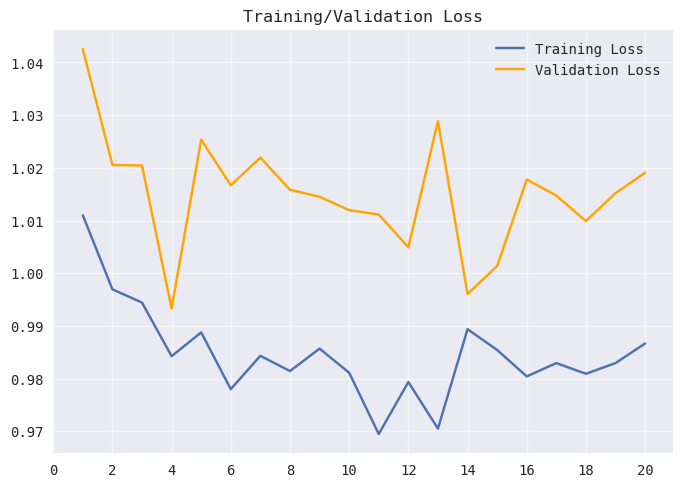

In [59]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [60]:
print(f"Predicted model Parameters:", "Weights: {}".format(model.linear.weight), "Bias: {}".format(model.linear.bias), sep="\n")

Predicted model Parameters:
Weights: Parameter containing:
tensor([[0.1070, 0.0588]], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([-0.2427], device='cuda:0', requires_grad=True)


In [61]:
print(f"Shapes for Weight and Bias Tensors:", model.linear.weight.shape, model.linear.bias.shape, sep="\n")

Shapes for Weight and Bias Tensors:
torch.Size([1, 2])
torch.Size([1])
